# 2.1 什么是统计学系

实际上，统计学系是关于估计$f$的一系列方法。

##  2.1.1 irreducible error & reducible error
 
 \begin{align*}
\mathbb{E}\left[(Y-\hat Y)^2\right]
  &=\mathbb{E}\left[\left(f(X)+\epsilon-\hat{f}(X)\right)^2\right] \\
  &=\mathbb{E}\left[\left(f(X)+\epsilon-\hat{f}(X)\right)
                    \left(f(X)+\epsilon-\hat{f}(X)\right)\right] \\
  &=\mathbb{E}\left[\left(f(X)-\hat{f}(X)\right)
                    \left(f(X)+\epsilon-\hat{f}(X)\right)
                   +\epsilon
                    \left(f(X)+\epsilon-\hat{f}(X)\right)\right] \\
  &=\mathbb{E}\left[\left(f(X)-\hat{f}(X)\right)^2
                    +\epsilon
                     \left(f(X)-\hat{f}(X)\right)
                   +\epsilon
                    \left(f(X)-\hat{f}(X)\right)
                   +\epsilon^2\right] \\
\text{Because the expectation is linear}&\\
  &=\mathbb{E}\left[\left(f(X)-\hat{f}(X)\right)^2\right]
   +\mathbb{E}\left[\epsilon^2\right]
   +2\mathbb{E}\left[\epsilon
                     \left(f(X)-\hat{f}(X)\right)\right] \\
\text{Because $f$ and $\hat{f}$ are constant}&\\
  &=\left[f(X)-\hat{f}(X)\right]^2
   +\mathbb{E}\left[\epsilon^2\right]
   +2\mathbb{E}\left[\epsilon
                     \left(f(X)-\hat{f}(X)\right)\right] \\
\text{Because the mean of $\epsilon$ is zero}&\\
  &=\left[f(X)-\hat{f}(X)\right]^2
   +\mathbb{E}\left[\epsilon^2\right] \\
\text{Because the variance of $\epsilon$ is $\mathbb{E}(\epsilon^2)$}&\\
  &=\left[f(X)-\hat{f}(X)\right]^2 + \text{Var}(\epsilon)
\end{align*} 

[Proof for Irreducible Error statement in ISLR page 19](https://stats.stackexchange.com/questions/191113/proof-for-irreducible-error-statement-in-islr-page-19)

不过认为irreducible error应该是

\begin{align*}
\mathbb{E}\left[f(X)-\hat{f}(X)\right]^2 
\end{align*} 

# 2.2 评价模型精度

##  2.2.2 偏差-方差权衡

样本集（数据集）服从一个分布，$Dx, y)$。所以给定一个样本$x_0$，$y \sim D_{x_0}(x,y)$。而回归问题通常是求 $\bar y$，而且我们通常假定均值为$\omega^Tx$。

给定$x_0$，通过对此训练（大量采样得到不同的训练集）对其进行多次估计，**期望测试均方误差**可以分解为三个基本量的和，分别为$\hat{f}(x_0)$的方差、$\hat{f}(x_0)$偏差的平方，以及误差想$\epsilon$的方差，

$\text{E} (y_0-\hat{y}(x_0))^2 = \text{Var}(\hat{f}(x_0))+\left[\text{Bias}(\hat{f}(x_0))\right]^2+\text{Var}(\epsilon)$

其中，$\epsilon=y_D-y$，即训练集**标注错误**的情况，假定$\text{E}(\epsilon)=0$，则$\text{Var}(\epsilon)=E(\epsilon)^2$

从上面的公式可以看出，**期望测试均方误差**实际上就是，用多次训练得到的$f$对$x_0$进行估计的**平均测试均方误差（average test MSE）**。

+ 方差：代表使用一个不同的训练数据集估计$\hat{f}$时，估计函数的改变量
+ 偏差：指为了选择一个简单的模型逼近真实函数而被带入的误差/期望输出（多次输出的均值）与真实输出的差距

不同的训练集，相同的模型，学得的参数不同。但是，理想的情况是，不同的数据集所得到的$\hat{f}$变化不大。不过，如果一个模型有较大的方差，那么训练集微小的变化会导致$\hat{f}$较大的改变。

通常，光滑度越高的统计模型有更高的方差，同时对模型的假设也比较少。

[Why is the variance of the error term (a.k.a., the “irreducible error”) always 1 ](https://stats.stackexchange.com/questions/228896/why-is-the-variance-of-the-error-term-a-k-a-the-irreducible-error-always-1)

## 2.2.3 分类模型

**贝叶斯决策论**是概率框架下实施决策的基本方法。在所有相关概率都已知的理想情形下，贝叶斯决策论考虑如何基于这些概率和误判损失来选择最优的类别标记。

假设有$N$种可能的类别标记，$\lambda_{ij}$是将一个真是标记为$c_j$的样本误分类为$c_I$所产生的损失。那么样本$\mathbb{x}$分类为$c_i$所产生的期望损失，即在样本$\mathbb{x}$上的条件风险为：

$R(c_i|\mathbb{x})=\sum_{j=1}^N\lambda_{ij}P(c_j|\mathbb{x})$

任务就是寻找一个判定准则$f$：最小化总体风险$R(f)=\mathbb{E}\left[R(f(x)|x)\right]$

对于每一个样本$x$，若$h$能最小话条件风险$R(f(x)|x)$，那么就能最小化总体风险！这也就是**贝叶斯判定准则**：为最小化总体风险，只需要在每个样本上选择那个能使条件风险$R(c|\mathbb{x})最$小的类别标记，即

$f^*(x)=arg \min \limits_{c \in Y} R(c|x)$

此时$f^*$称为贝叶斯最优分类器，与之对应的总体风险$R(f^*)$称为贝叶斯风险。$1-R(f^*)$反映了分类器所能达到的最优性能，即通过机器学习所能产生的模型精度的上限。

[《机器学习》7.1]()

而**贝叶斯错误率**则对应于$\lambda_{ij}=1$。

$c^*=arg\max \limits_{j} Pr(Y=j|X=x_0)$

在$x_0$处的贝叶斯错误率为$1-\max \limits_j Pr(Y=j|X=x_0)$

那么，整个的贝叶斯错误率为：$1-E(\max \limits_j Pr(Y=j|X))$，即所有样本错误率的均值。

而$KNN$分类器，也是先给定$X$后估计$Y$的条件分布，然后将一个给定的观测分类到估计分布概率最大的类别中。$\mathbb{N}_0$表示离$x$最近的$k$个点的集合，给定$x_0$，属于类别$j$的条件概率估计为 $Pr(Y=j|X=x_0)=\frac{1}{K}\sum_{i \in N_0}I(y_i=j)$

# 2.3 R语言简介

## 2.3.1 基本命令

In [2]:
x <- c(1,3,2,5)
x

[1] 1 3 2 5

## 2.3.2 图形

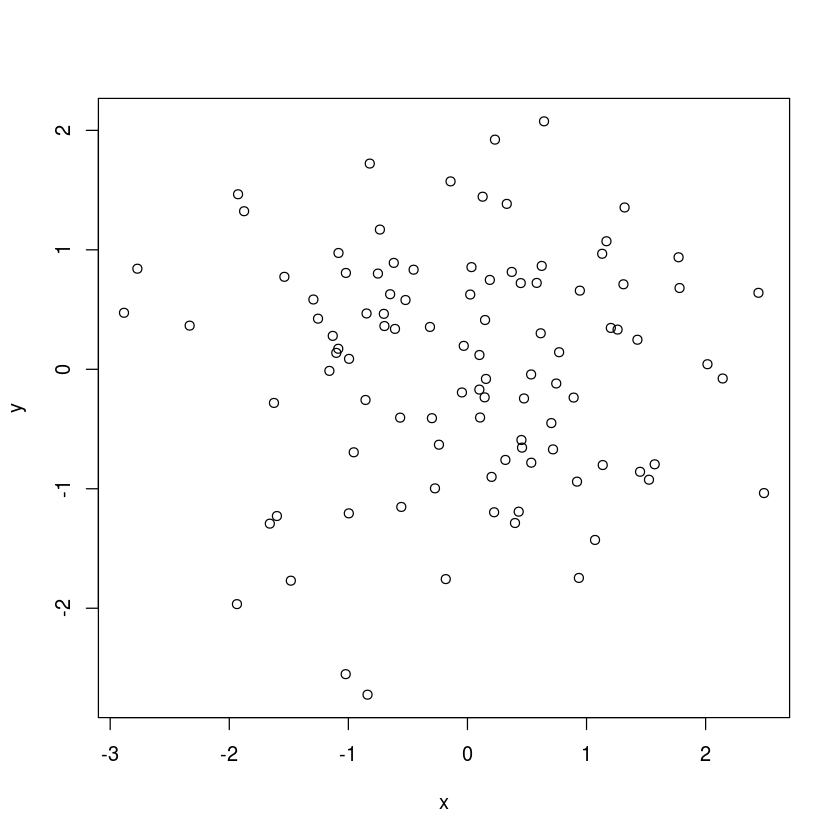

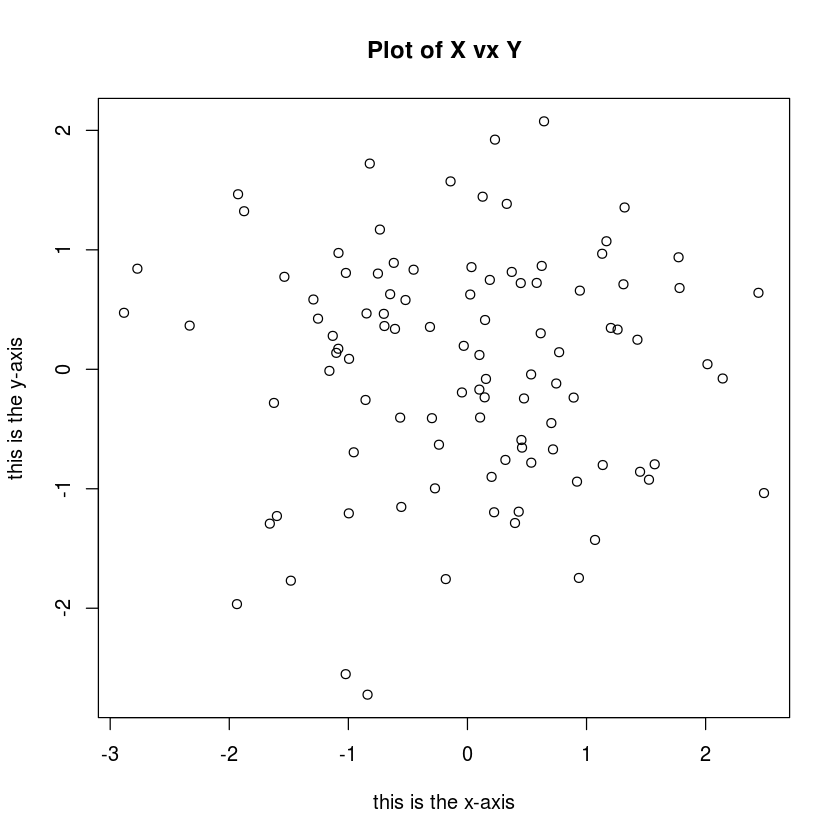

In [3]:
x=rnorm(100)
y=rnorm(100)
plot(x,y)
plot(x,y,xlab = "this is the x-axis",ylab = "this is the y-axis",
    main="Plot of X vx Y")

In [4]:
pdf("Figure.pdf")
plot(x,y,col="green")
dev.off()

png 
  2

In [6]:
x=seq(-pi,pi,length=50)
y=x

f=outer(x,y,function(x,y)cos(y)/(1+x^2))

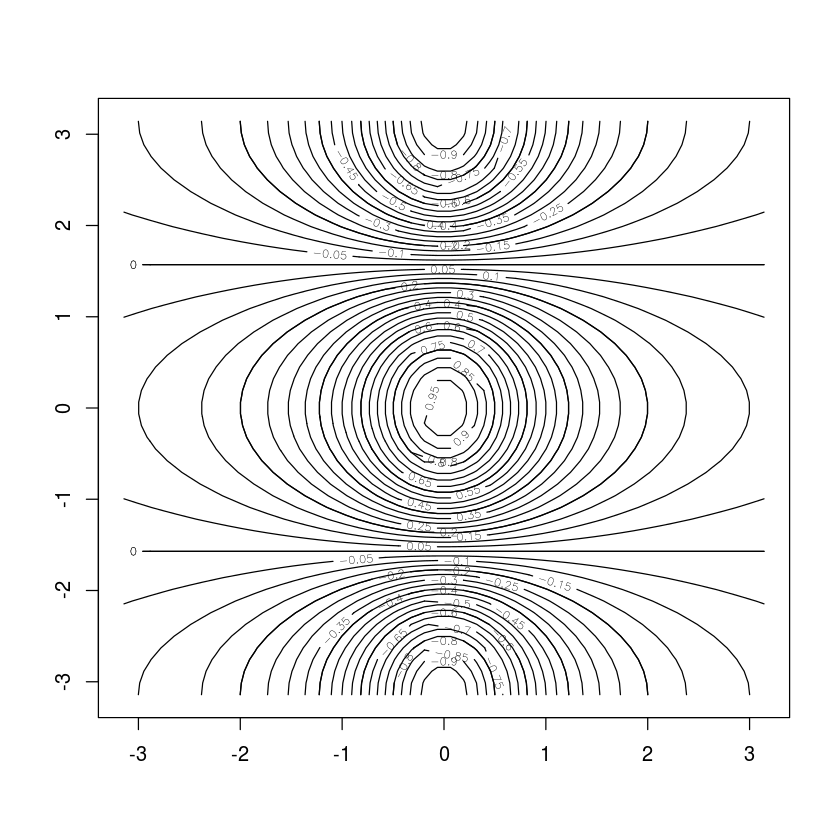

In [9]:
contour(x,y,f)
contour(x,y,f,nlevels=45,add=T)

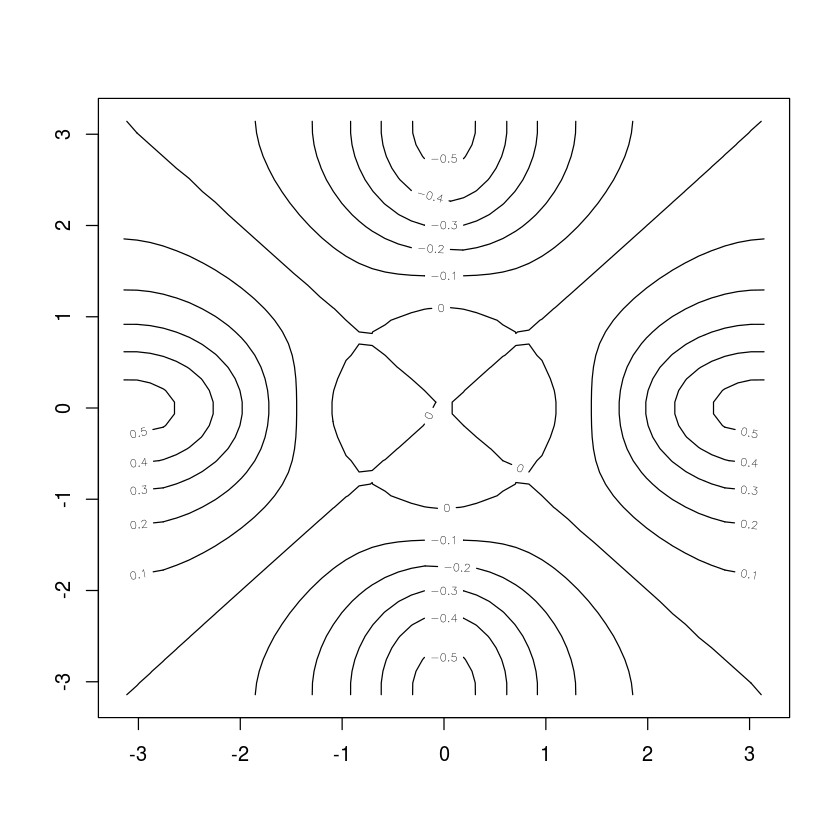

In [10]:
fa=(f-t(f))/2
contour(x,y,fa,nlevels=15)

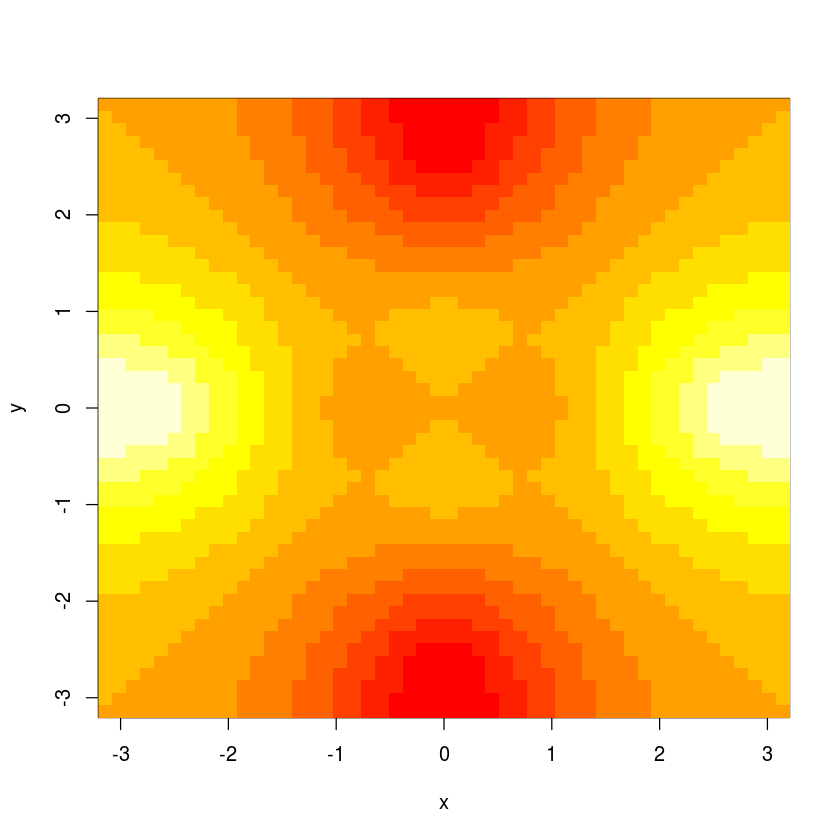

In [11]:
image(x,y,fa)

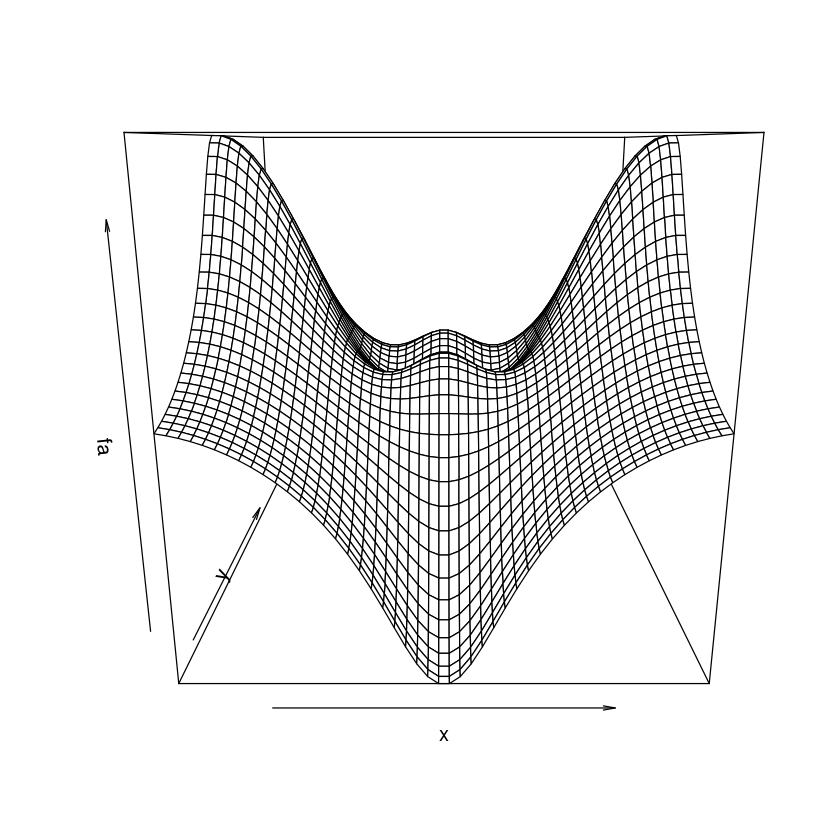

In [12]:
persp(x,y,fa)

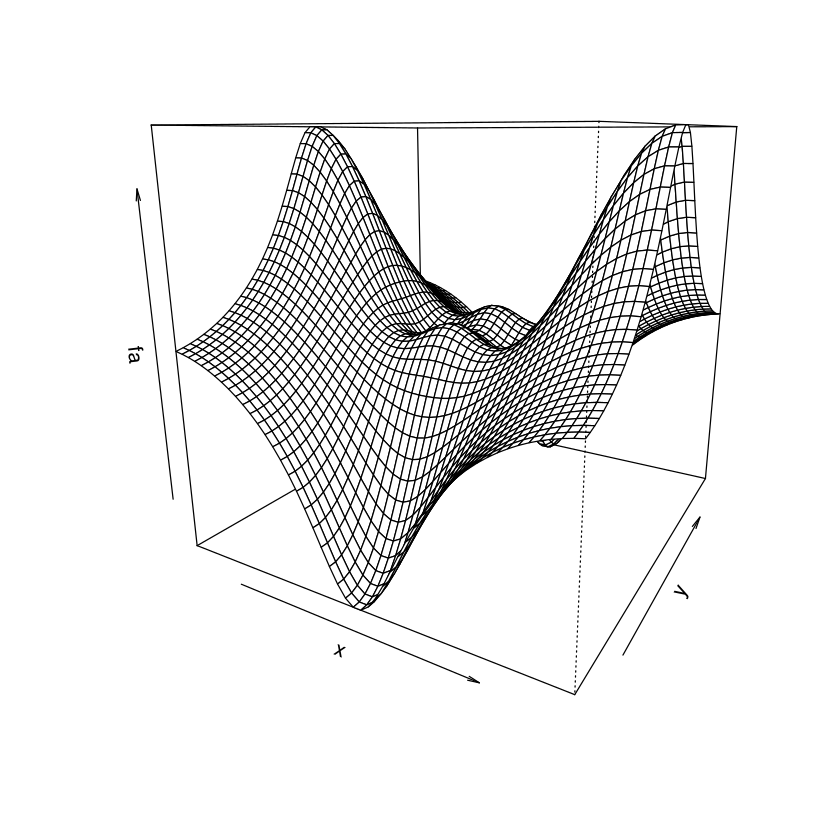

In [14]:
persp(x,y,fa,theta=30)

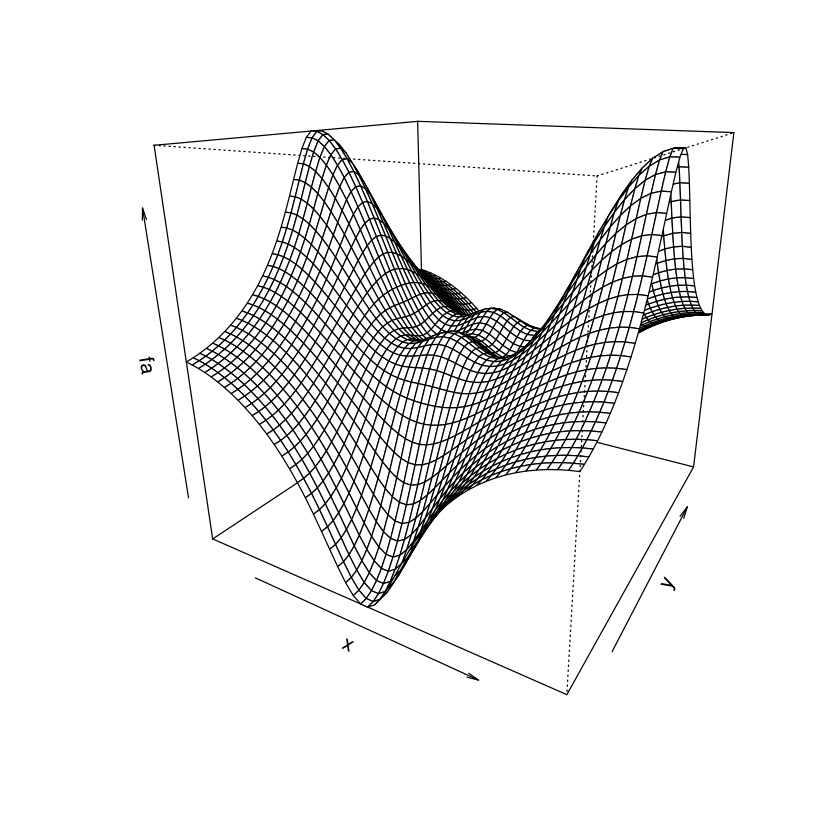

In [15]:
persp(x,y,fa,theta=30,phi=20)

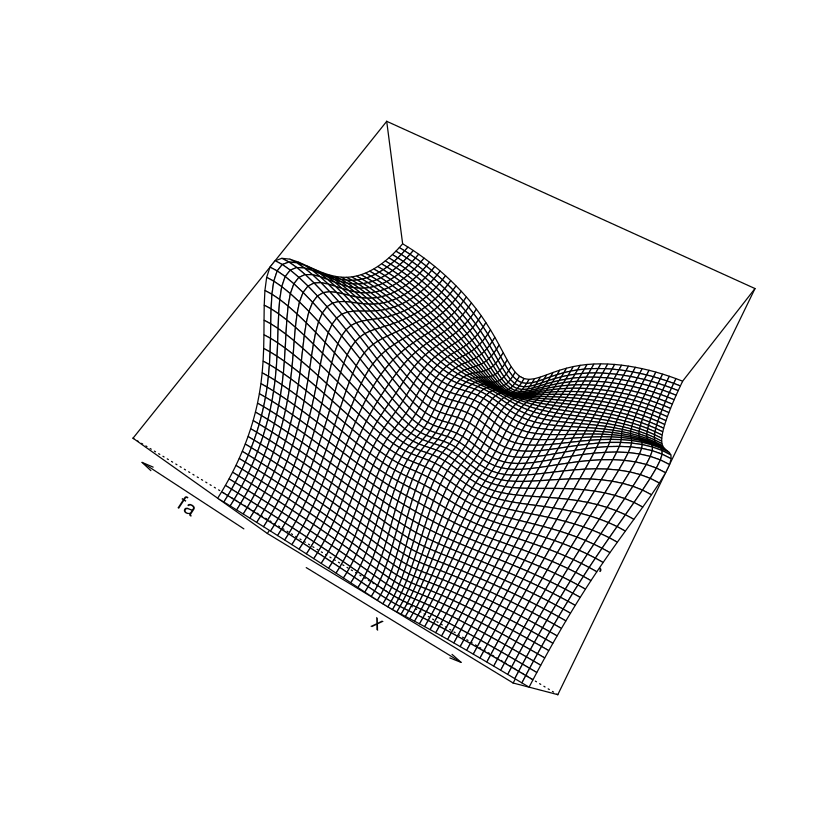

In [16]:
persp(x,y,fa,theta=30,phi=70)

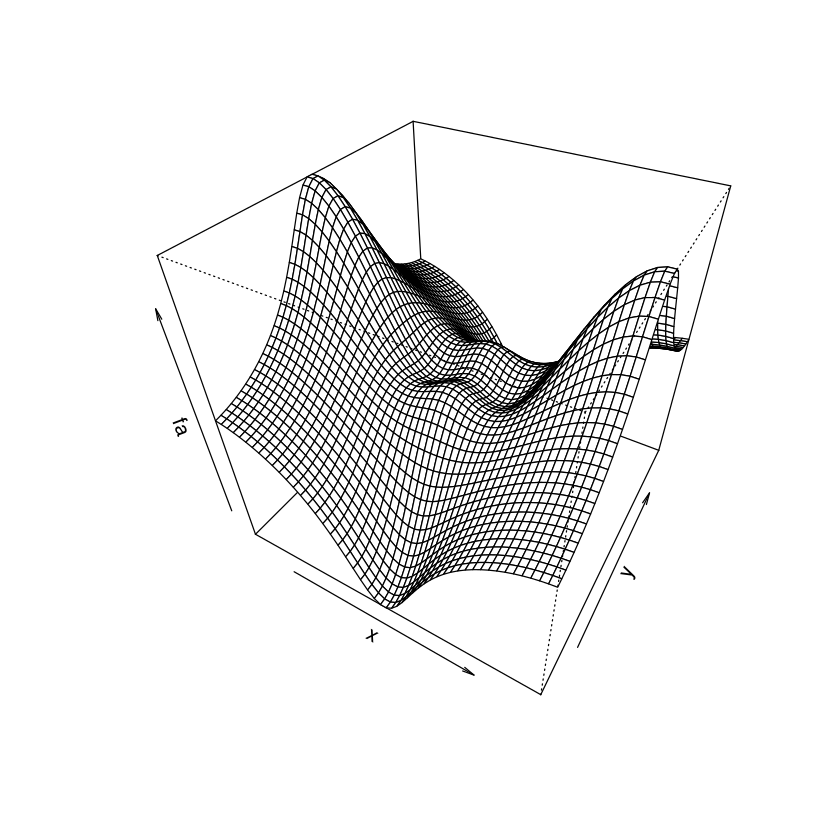

In [17]:
persp(x,y,fa,theta=30,phi=40)

## 2.3.4 载入数据

In [34]:
library(ISLR)

In [40]:
# Auto=read.table("Auto.data",header=T,na.strings="?")
# Auto=read.csv("Auto.csv",header=T,na.strings="?")

In [41]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [42]:
fix(Auto)

In [43]:
dim(Auto)

[1] 392   9

In [44]:
Auto=na.omit(Auto)
dim(Auto)

[1] 392   9

In [45]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

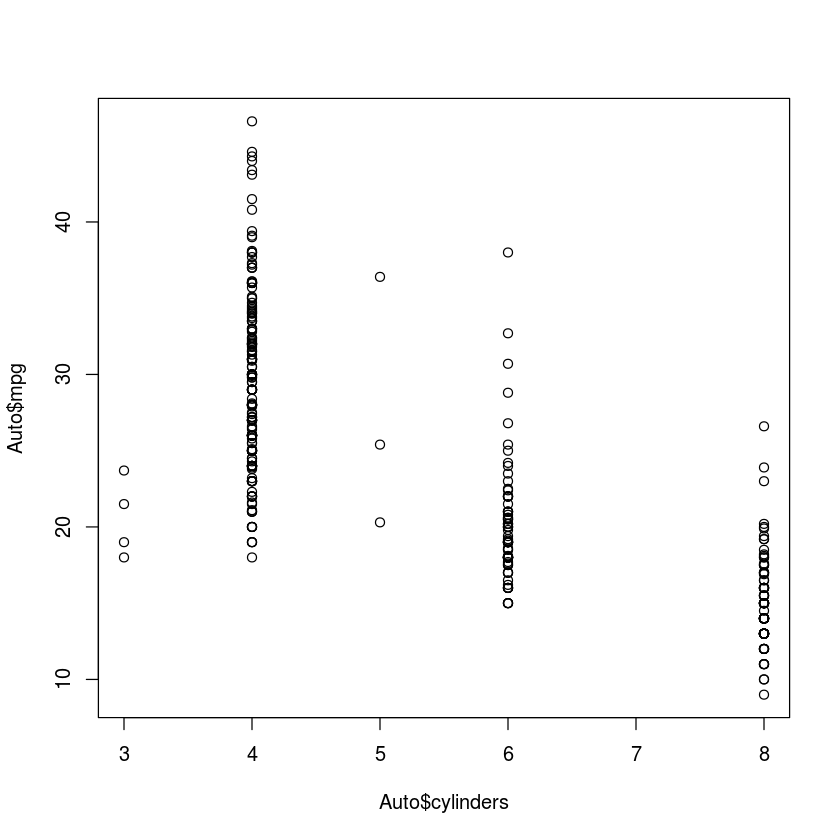

In [47]:
plot(Auto$cylinders, Auto$mpg)
#attach(Auto)
#plot(cylinders, mpg)

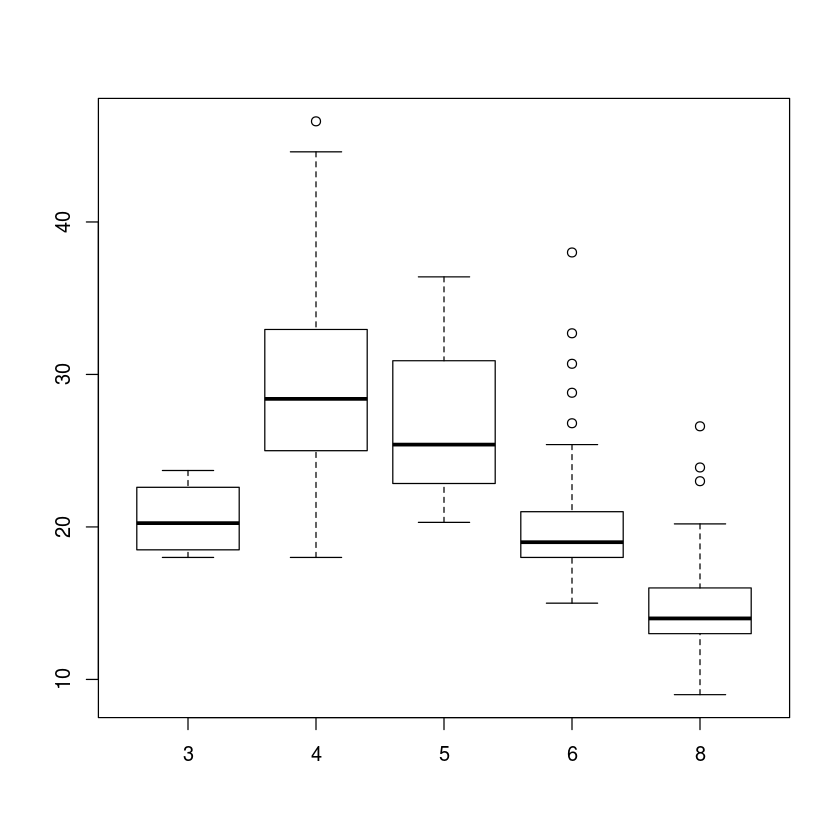

In [48]:
attach(Auto)
cylinders=as.factor(cylinders)

plot(cylinders, mpg)

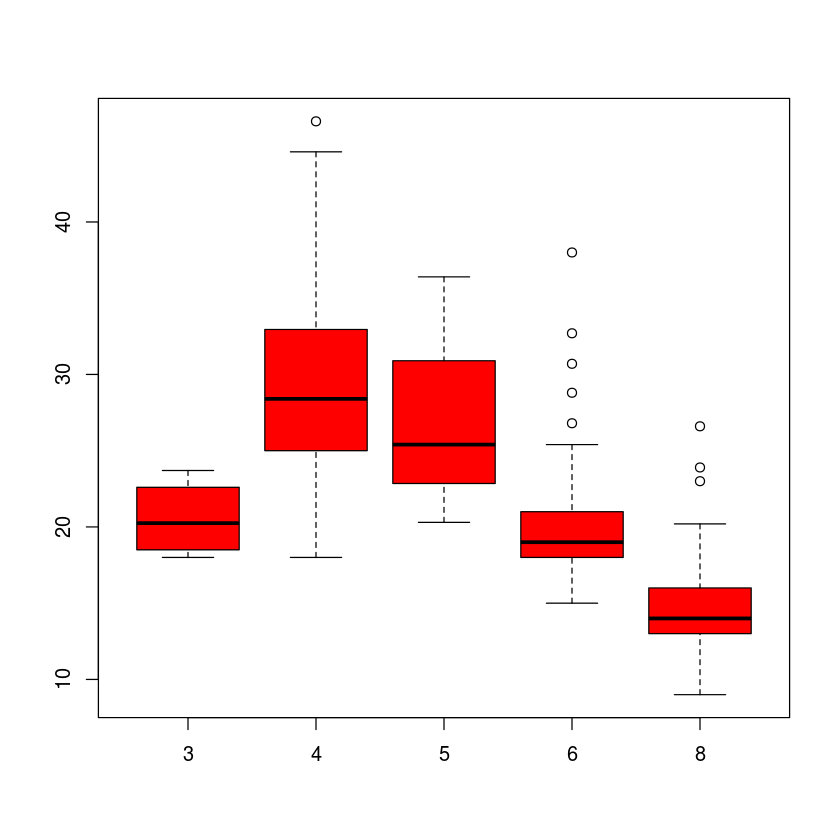

In [49]:
plot(cylinders, mpg, col='red')

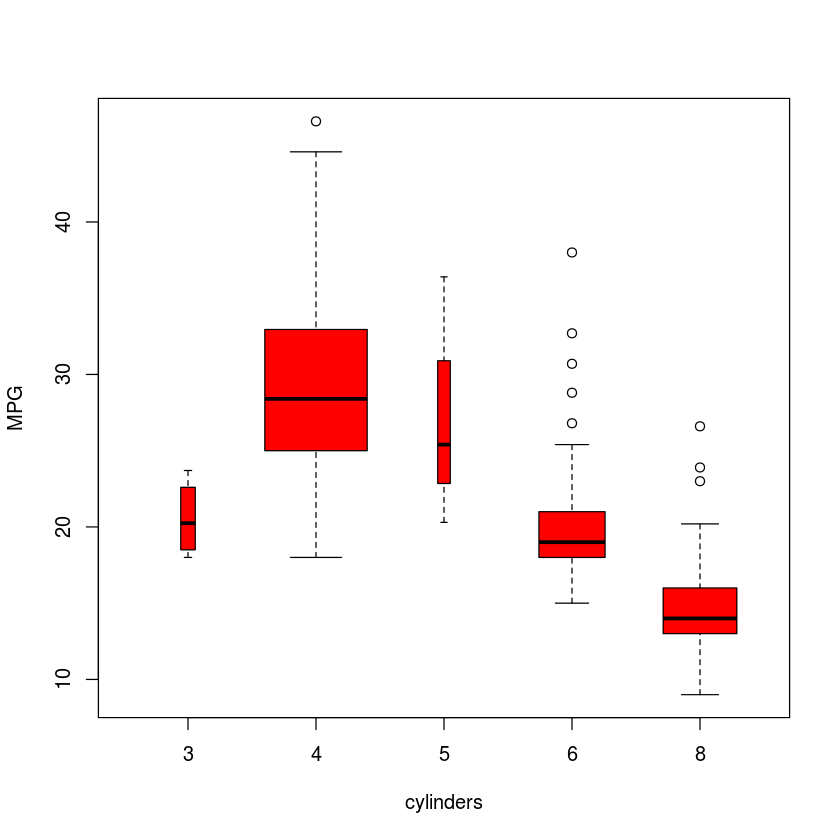

In [52]:
plot(cylinders, mpg, col='red',varwidth=T, xlab = "cylinders", ylab = "MPG")

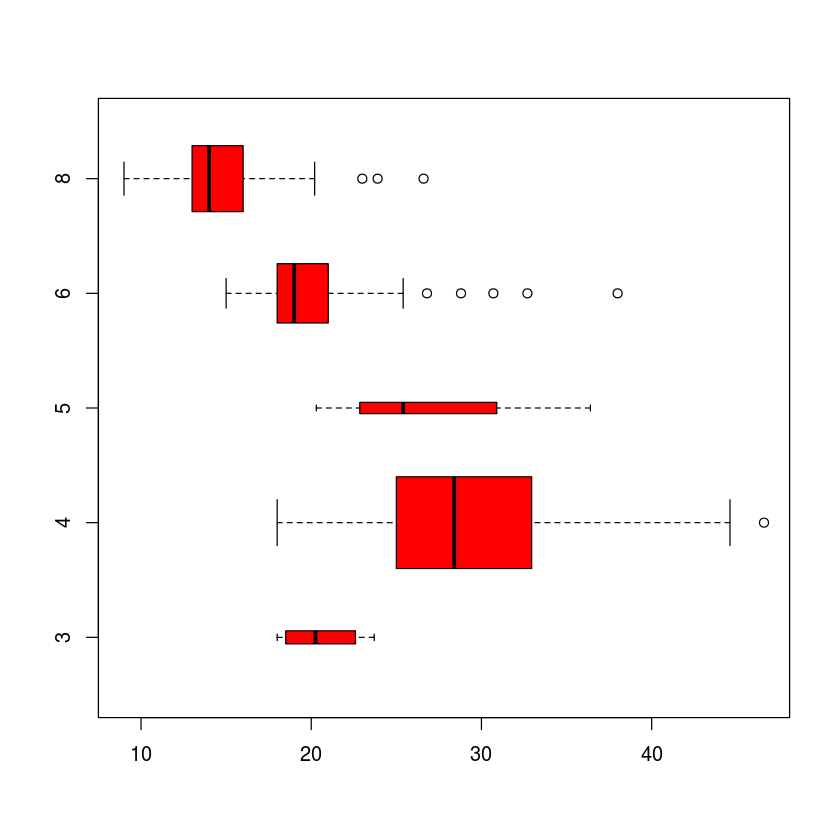

In [51]:
plot(cylinders, mpg, col='red',varwidth=T,horizontal=T)

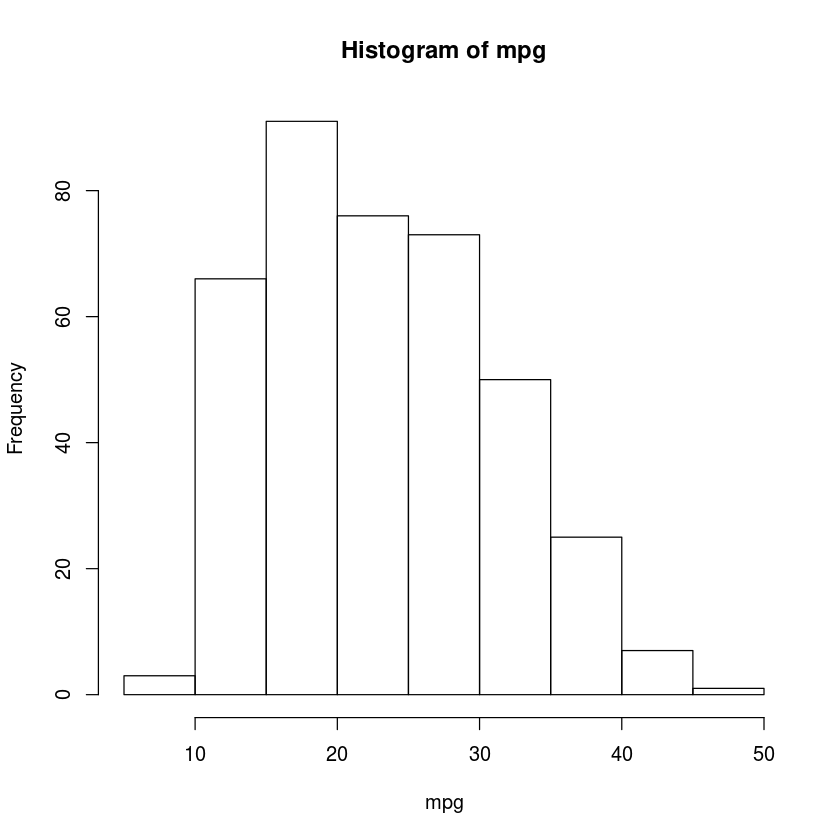

In [53]:
hist(mpg)

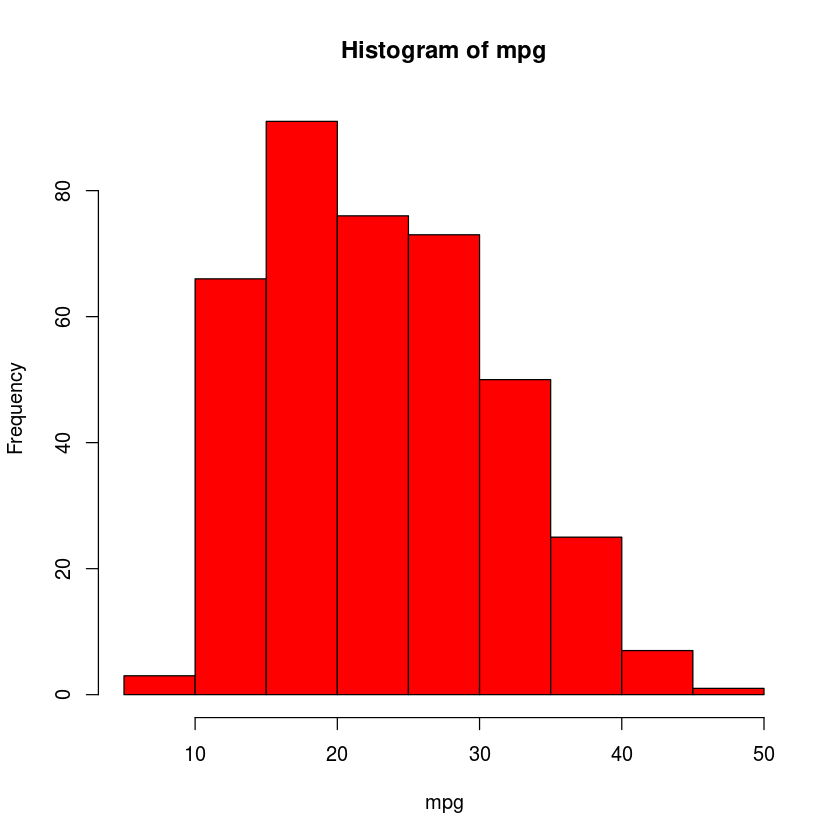

In [54]:
hist(mpg,col=2)

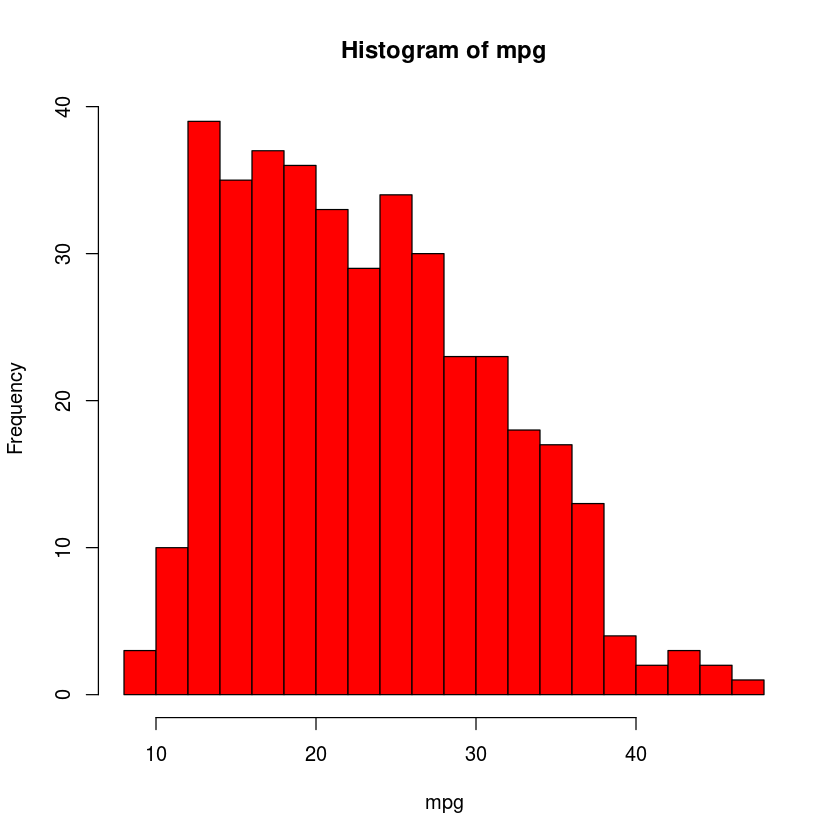

In [55]:
hist(mpg,col=2, breaks=15)

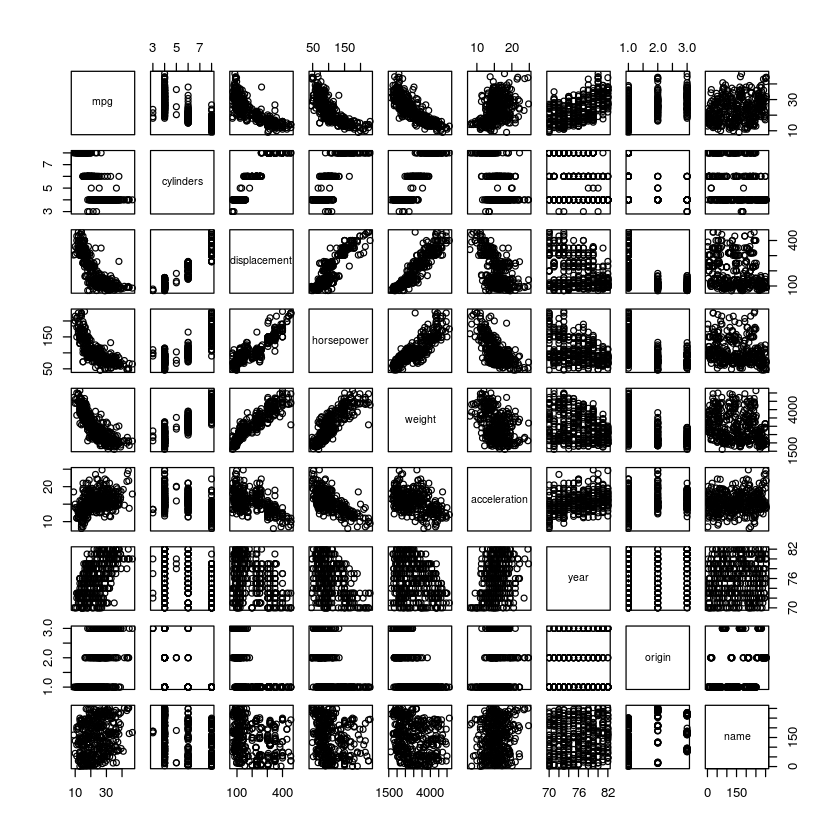

In [56]:
pairs(Auto)

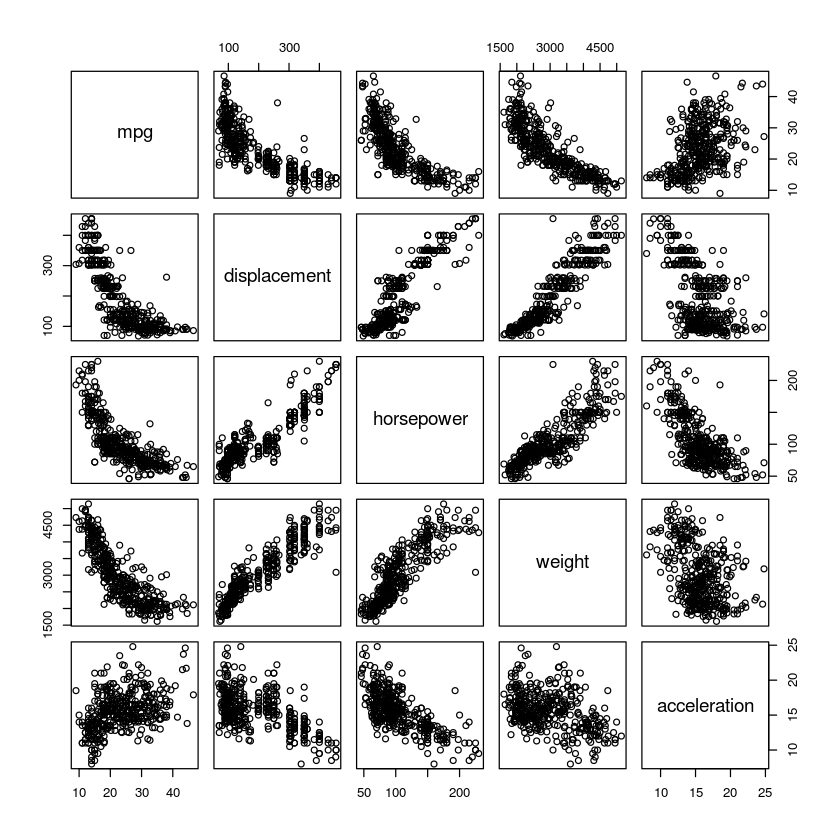

In [57]:
pairs(~mpg+displacement+horsepower+weight+acceleration, Auto)

integer(0)

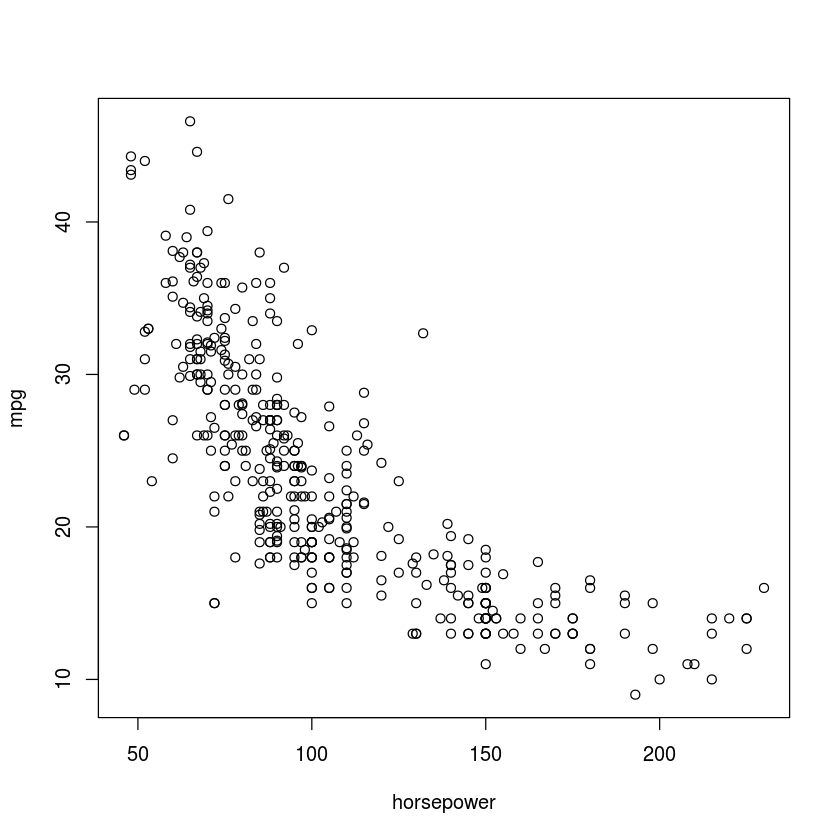

In [62]:
plot(horsepower, mpg)
identify(horsepower, mpg, name)

In [63]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [65]:
summary(mpg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   17.00   22.75   23.45   29.00   46.60 